In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Linear regression in one dimension
class linear_regression_1D:
    
    # Class constructor
    def __init__(self):
        # Define the vector w (the slop of the line)
        # w is the two diemensional vector becuase we must absorb b into w
        self.w = np.zeros(2)
        # Define the learning rate
        self.alpha = 1

    # Class function to set the learning rate
    def set_learning_rate(self, alpha):
        self.alpha = alpha

    # Class function to fit the data (find the appropiate value of w)
    def fit(self, x, y, iteration=1500):
        self.y = y
        # Apply transformation to x. Recall that we must absorb b into w 
        self.x = np.append(x.transpose(), np.ones((x.shape[1], 1)), axis=1)
        self.n = len(x)
        # Iteratively make an updage for w by gradient descent
        # stop upgrade when increases loss
        for i in range(iteration):
            if(self.make_one_update()):
                pass
            else:
                return

    # Class function to make an update for w
    def make_one_update(self):
        w_current = self.w
        # Set step size 
        step = (-1)*self.alpha*self.compute_gradient(w_current)
        w_update = w_current + step
        norm_s = math.sqrt(np.inner(step,step))
        print("Norm of s is ",norm_s)
        # Check it near minimum point
        if(norm_s < 0.0000000000001):
            print("Reach convergence!!!")
            return False
        # Report the progress of convergence
        current_loss = self.sq_loss(w_current)
        update_loss = self.sq_loss(w_update)
        #check W is increase or decrease (we want decrease W)
        if current_loss > update_loss:
            print("Loss decreases to ", update_loss,)
            self.w = w_update
            return True
        else:
            print("Loss increases to ", update_loss,)
            return False
    
    # Class function to compute the gradient with respect to the current w
    def compute_gradient(self, w_current):
        grad_l_w = np.zeros(2)
        # Uncomment the following to implement how to compute the gradient vector 
        for i in range(self.n):
            grad_l_w[0] = grad_l_w[0] + self.x[i][0]*(np.inner(w_current,self.x[i])-self.y[i])  
            grad_l_w[1] = grad_l_w[1] + (np.inner(w_current,self.x[i])-self.y[i]) 
        grad_l_w[0] = (2/self.n)*grad_l_w[0]
        grad_l_w[1] = (2/self.n)*grad_l_w[1]
        print("The norm of grad vector is ", math.sqrt(np.inner(grad_l_w, grad_l_w)))
        return grad_l_w

    # Class function to compute the square loss function
    def sq_loss(self, w):
        # Uncomment the following to implement how to compute the loss function
        loss = 0
        for i in range(self.n):
            p = np.inner(w,self.x[i])-self.y[i]
            loss = loss + (p*p)
        loss = (1/self.n)*loss
        return loss
        

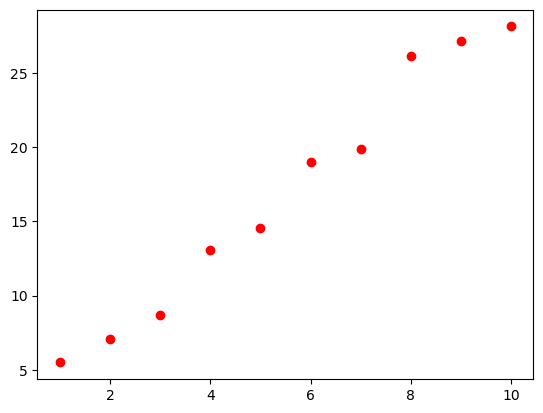

In [2]:
# Create our data set where x is one-dimensional
x = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]])
y = np.array([5.5, 7.1, 8.7, 13.1, 14.56, 19.01, 19.85, 26.12, 27.11, 28.112])

# The 2D plot of our data
plt.plot(x.transpose(), y, 'ro')
plt.show()


In [3]:
x

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [4]:

h = linear_regression_1D()

# You may edit the learning rate if the current setting does not yield convergence
h.set_learning_rate(1/10000)

# Uncomment the following to fit the vector w to our data. 
# You may also edit the number of iterations if the current setting does not yield convergence
h.fit(x, y, iteration=10000)

The norm of grad vector is  15.556349186104045
Norm of s is  0.0015556349186104045
Loss decreases to  30.22580484
The norm of grad vector is  15.550126646429604
Norm of s is  0.0015550126646429606
Loss decreases to  30.20162903225677
The norm of grad vector is  15.54390659577103
Norm of s is  0.0015543906595771033
Loss decreases to  30.177472561291616
The norm of grad vector is  15.537689033132724
Norm of s is  0.0015537689033132726
Loss decreases to  30.153335411638185
The norm of grad vector is  15.53147395751947
Norm of s is  0.001553147395751947
Loss decreases to  30.129217567842545
The norm of grad vector is  15.525261367936462
Norm of s is  0.0015525261367936463
Loss decreases to  30.105119014463085
The norm of grad vector is  15.519051263389288
Norm of s is  0.0015519051263389288
Loss decreases to  30.08103973607055
The norm of grad vector is  15.512843642883931
Norm of s is  0.001551284364288393
Loss decreases to  30.05697971724806
The norm of grad vector is  15.50663850542678


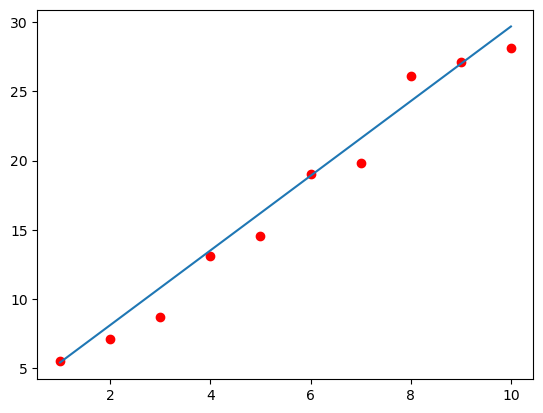

In [5]:
# The following codes is to give a 2D plot our data and the linear function that we learnt from our setting
plt.plot(x.transpose(), y, 'ro')
plt.plot(x.transpose(), x.transpose()*h.w[0]+h.w[1], linestyle='solid')
plt.show()